In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Данные по пропеллеру

In [ ]:
D = 14*25.4 / 1000 # propeller diameter
rho = 1.22 # air density
omega3000 = 3000 * 2 * np.pi / 60 # 
omega4000 = 4000 * 2 * np.pi / 60 # 
omega5000 = 5000 * 2 * np.pi / 60 # 
omega6000 = 6000 * 2 * np.pi / 60 # 
omega7000 = 7000 * 2 * np.pi / 60 #
omega8000 = 8000 * 2 * np.pi / 60 # 
omega9000 = 9000 * 2 * np.pi / 60 # 
Vin = np.linspace(12.8, 16.8, 1000) # input voltage

Static = np.loadtxt("Static.txt", skiprows=1)
D3000 = np.loadtxt("3000RPM.txt", skiprows=1)
D6000 = np.loadtxt("6000RPM.txt", skiprows=1)
D4000 = np.loadtxt("4000RPM.txt", skiprows=1)
D5000 = np.loadtxt("5000RPM.txt", skiprows=1)

Va6000 = D6000[:, 0]* omega6000 * D / (2 * np.pi)
Va6000 = np.linspace(Va6000[0], Va6000[-1], len(D6000[:,0]))
Va3000 = D3000[:, 0]* omega3000 * D / (2 * np.pi)
Va3000 = np.linspace(Va3000[0], Va3000[-1], len(D3000[:,0]))
Va4000 = D4000[:, 0]* omega4000 * D / (2 * np.pi)
Va4000 = np.linspace(Va4000[0], Va4000[-1], len(D4000[:,0]))
Va5000 = D5000[:, 0]* omega5000 * D / (2 * np.pi)
Va5000 = np.linspace(Va5000[0], Va5000[-1], len(D5000[:,0]))

## Данные моделирования с сайта APC

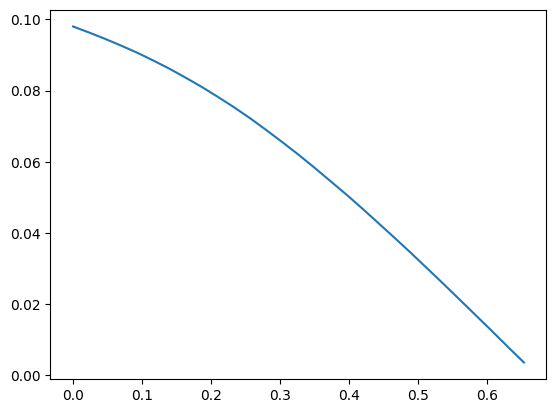

In [26]:
APC6000 = np.loadtxt('APC6000RPM.txt')
APC5000 = np.loadtxt('APC5000RPM.txt')
APCf6000ct = interp1d(APC6000[:, 1], APC6000[:, 3], 'cubic')
APCf5000ct = interp1d(APC5000[:, 1], APC5000[:, 3], 'cubic')
plt.plot(APC6000[:, 1], APC6000[:, 3])
APCVa6000 = omega6000*APC6000[:, 1]*D/(2*np.pi)
APCVa5000 = omega5000*APC5000[:, 1]*D/(2*np.pi)

## Данные по мотору

In [14]:
AT2814 = np.loadtxt("C:/Users/PC/Education/SKAT2025/KB-102_SKAT_2025/ПромежуточныйДизайн/СиловаяУстановка/AT2814.txt", skiprows=1)
AT2814
Kv900 = 60/(2*np.pi*AT2814[0, 0])
Kv900

np.float64(0.01061032953945969)

array([-0.13967328, -0.09419982,  0.1086236 ])

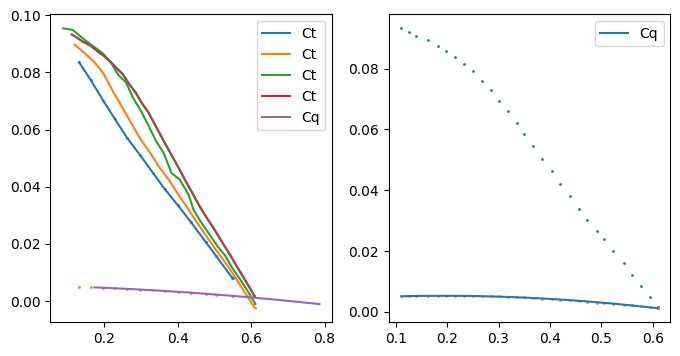

In [18]:
p3000ct = np.polyfit(D3000[:, 0], D3000[:, 1], 2)
p3000cq = np.polyfit(D3000[:, 0], D3000[:, 2]/(2*np.pi), 2)
p6000ct = np.polyfit(D6000[:, 0], D6000[:, 1], 2)
p6000cq = np.polyfit(D6000[:, 0], D6000[:, 2]/(2*np.pi), 2)
p4000ct = np.polyfit(D4000[:, 0], D4000[:, 1], 2)
p4000cq = np.polyfit(D4000[:, 0], D4000[:, 2]/(2*np.pi), 2)
p5000ct = np.polyfit(D5000[:, 0], D5000[:, 1], 2)
p5000cq = np.polyfit(D5000[:, 0], D5000[:, 2]/(2*np.pi), 2)


f3000ct = interp1d(D3000[:, 0], D3000[:, 1], 'cubic')
f6000ct = interp1d(D6000[:, 0], D6000[:, 1], 'cubic')
f4000ct = interp1d(D4000[:, 0], D4000[:, 1], 'cubic')
f5000ct = interp1d(D5000[:, 0], D5000[:, 1], 'cubic')


fig, ax = plt.subplots(1,2, figsize=(8,4))
ax.ravel()
ax[0].scatter(D3000[:, 0], D3000[:, 1], s=1)
ax[0].plot(D3000[:, 0], f3000ct(D3000[:, 0]), label='Ct')
ax[0].plot(D4000[:, 0], f4000ct(D4000[:, 0]), label='Ct')
ax[0].plot(D5000[:, 0], f5000ct(D5000[:, 0]), label='Ct')
ax[0].plot(D6000[:, 0], f6000ct(D6000[:, 0]), label='Ct')


ax[0].scatter(D3000[:, 0], D3000[:, 2]/(2*np.pi), s=1)
ax[0].plot(np.linspace(0.173, 0.786, 100), np.polyval(p3000cq, np.linspace(0.173, 0.786, 100)), label='Cq')
ax[0].legend()

ax[1].scatter(D6000[:, 0], D6000[:, 1], s=1)
ax[0].plot(D6000[:, 0], f6000ct(D6000[:, 0]), label='Ct')

ax[1].scatter(D6000[:, 0], D6000[:, 2]/(2*np.pi), s=1)
ax[1].plot(D6000[:, 0], np.polyval(p6000cq, D6000[:, 0]), label='Cq')
ax[1].legend()
p6000ct

Text(0.5, 1.0, 'Тяга воздушного винта APC 14x70')

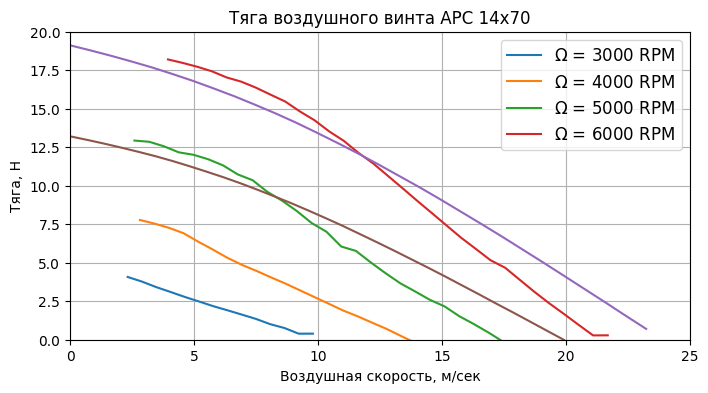

In [28]:
T3 = rho*D**4/(4*np.pi**2)*(omega3000**2)*f3000ct(D3000[:, 0])
T4 = rho*D**4/(4*np.pi**2)*(omega4000**2)*f4000ct(D4000[:, 0])
T5 = rho*D**4/(4*np.pi**2)*(omega5000**2)*f5000ct(D5000[:, 0])
T6 = rho*D**4/(4*np.pi**2)*(omega6000**2)*f6000ct(D6000[:, 0])
TAPC6000 = rho*D**4/(4*np.pi**2)*(omega6000**2)*APCf6000ct(APC6000[:, 1])
TAPC5000 = rho*D**4/(4*np.pi**2)*(omega5000**2)*APCf5000ct(APC5000[:, 1])
fig1, ax1 = plt.subplots(1,1, figsize=(8,4))
ax1.plot(Va3000, T3, label = r'$\Omega$ = 3000 RPM')
ax1.plot(Va4000, T4, label = r'$\Omega$ = 4000 RPM')
ax1.plot(Va5000, T5, label = r'$\Omega$ = 5000 RPM') 
ax1.plot(Va6000, T6, label = r'$\Omega$ = 6000 RPM') 
ax1.plot(APCVa6000, TAPC6000)
ax1.plot(APCVa5000, TAPC5000)
# ax1.plot(Vaf7000, T7f, '--', label = r'$\Omega$ = 7000 false RPM')
# ax1.plot(Va6000, T7, '--',label = r'$\Omega$ = 7000 RPM') 
# ax1.plot(Va6000, T8, '--',label = r'$\Omega$ = 8000 RPM')
ax1.set_xlim(0, 25)
ax1.set_ylim(0, 20)
ax1.legend(fontsize=12)
ax1.grid('Major')
ax1.set_xlabel('Воздушная скорость, м/сек')
ax1.set_ylabel('Тяга, Н')
ax1.set_title('Тяга воздушного винта APC 14x70')